### <span style="color:black;">TALK GUIDELINE:<br><br>1. Definition<br>2. Score Interpretation<br>3. Characteristics<br>4. Prerequisites<br>5. Enable API<br>6. Applications and Examples<br><span> 


# <span style="color:orange;">Definition<span>

#### <span style="color:black;">Perspective [API](https://www.geeksforgeeks.org/what-is-an-api/) is a ["free"](https://developers.perspectiveapi.com/s/request-quota-increase?language=en_US) API that uses machine learning models to score the attributes (emotional concepts) of a comment. <br><br>When you send a request to the API, you’ll send the text of a single comment and the response will contain predictions about the perceived impact that comment may have on the conversation.<br><br>**A comment could be a single post to a web page’s comments section, a forum post, a message to a mailing list, a chat message, etc. <span>

#### <span style="color:black;">From the lens of NLP, Perspective API is a machine learning model that leverages [word-embedding](https://ingestai.io/blog/word-embeddings-in-nlp) techniques to build representations of words as vectors in a high-dimensional space, in which a metric distance should reflect the conceptual distance among words, therefore providing linguistic context.<span>

#### <span style="color:black;">Input: Text <br><br>Output: A probability score between 0 and 1. A higher score indicates a greater likelihood a reader would perceive the comment as containing the given attribute.<span>

#### <span style="color:black;"> (Well Defined) Emotion [Attributes](https://developers.perspectiveapi.com/s/about-the-api-attributes-and-languages?language=en_US): Toxicity is the most popular attribute.<span>

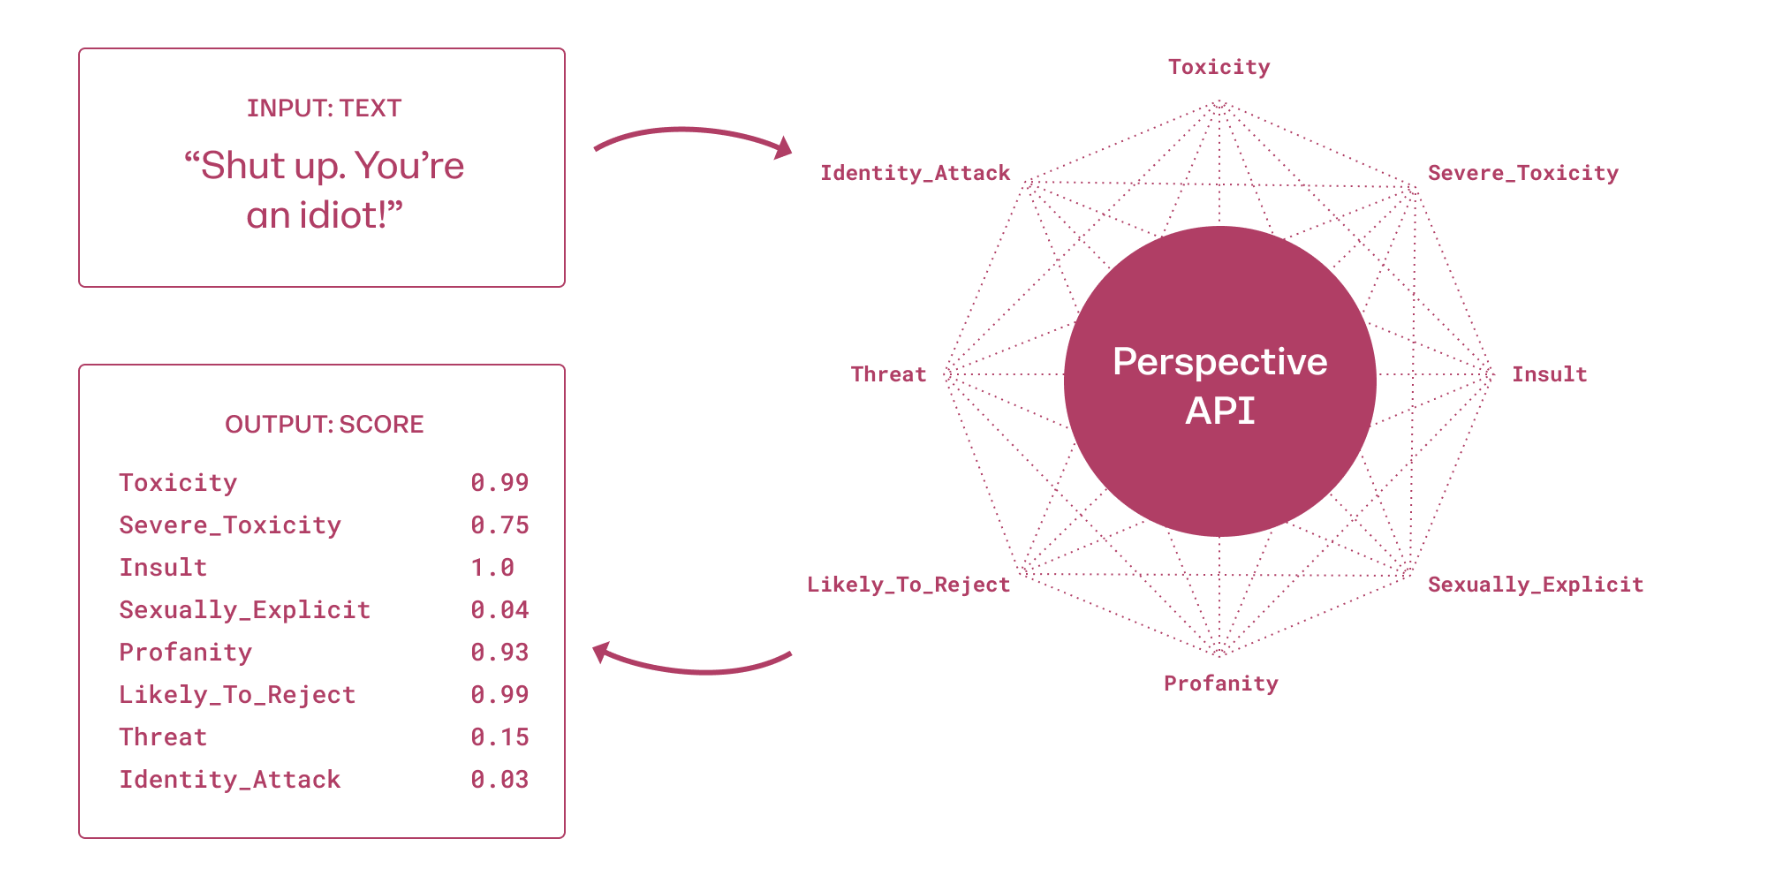

# <span style="color:orange;">Probability Score Interpretation<span>

#### <span style="color:black;"> The only score type currently offered is a probability score.<br><br>Probability scores represent a probability, with a value between 0 and 1. A higher score indicates a greater likelihood that a reader would perceive the comment as containing the given attribute. As such, a comment with a TOXICITY score of 0.9 is not necessarily more toxic than a comment with a TOXICITY score of 0.7. Rather, it’s more likely to be perceived as toxic by more readers. The score reflects the percentage of readers who would perceive the comment as toxic; a score of 0.9 indicates that 9 out of 10 readers would perceive the comment as toxic, and a score of 0.7 indicates that 7 out of 10 readers would perceive toxicity.<span>

# <span style="color:orange;">Other Characteristics<span>

#### <span style="color:black;">1. Support multiple language: English, Spanish, French, German, Portuguese, and Italian, etc. <br><br>2.Quota limit: Check your quota limits by going to your Google Cloud project's Perspective API page, and check your project's quota usage at the cloud console quota usage page.<br><br>3.The maximum text size per request is 20 KB. One character does not necessarily equal one byte, as different characters have different encodings. Note that models are trained on online comments, so performance will be best on text around that length. Read [the W3C guide on character encoding](https://www.w3.org/International/questions/qa-what-is-encoding). <br><br>4.Perspective API is hosted on the Google Cloud Platform and is open to any programming language. <span>

#### <span style="color:black;">5.[Model Reliability(Training Data)](https://developers.perspectiveapi.com/s/about-the-api-training-data?language=en_US)<span>

# <span style="color:orange;">Prerequisites<span>

#### <span style="color:black;">1. Have a Google account for accessing to the Google Cloud<br> 2. Use the Google Cloud console to set a [Google Cloud Project](https://console.cloud.google.com/welcome/new?pli=1) (or use any your existing ones; please follow the steps from #2 to #3) <br> 3. Fill the form to request [API access](https://docs.google.com/forms/d/e/1FAIpQLSdhBBnVVVbXSElby-jhNnEj-Zwpt5toQSCFsJerGfpXW66CuQ/viewform) (usually replied within 1h)<br><br><br>*Google cloud is a set of cloud computing services that runs on Google's infrastructure.<span>

# <span style="color:orange;">Enable API and Run the Code in Python<span>

#### <span style="color:black;">We can enable the API either from the command line or the Google Cloud console. <br><br>Cloud Console<span>

  

1.Navigate to the [Perspective API overview page](https://console.developers.google.com/apis/library/commentanalyzer.googleapis.com) and click "Enable".

2.Generate API key: Navigate to [Google API credentials page](https://console.cloud.google.com/apis/credentials?project=perspective-api-449621) and click "Create credentials".

3.Copy and securely save your key.

#### <span style="color:black;"> Below is a python scrpit using a sample from the Google API python Client Libraries.<span>

[terminal] source pspapi/bin/activate   <br> [kernel] pspapi

In [4]:
from googleapiclient import discovery
import json

In [15]:
API_KEY = 'fill_in_your_key'

client = discovery.build(
  "commentanalyzer",
  "v1alpha1",
  developerKey=API_KEY,
  discoveryServiceUrl="https://commentanalyzer.googleapis.com/$discovery/rest?version=v1alpha1",
  static_discovery=False,
)

analyze_request = {
  'comment': { 'text': 'You are an idiot!' },
  'requestedAttributes': {'TOXICITY': {}}
}

response = client.comments().analyze(body=analyze_request).execute()
print(json.dumps(response, indent=2))

{
  "attributeScores": {
    "TOXICITY": {
      "spanScores": [
        {
          "begin": 0,
          "end": 17,
          "score": {
            "value": 0.93383175,
            "type": "PROBABILITY"
          }
        }
      ],
      "summaryScore": {
        "value": 0.93383175,
        "type": "PROBABILITY"
      }
    }
  },
  "languages": [
    "en"
  ],
  "detectedLanguages": [
    "en"
  ]
}


# <span style="color:orange;">Applications and Examples<span>

#### <span style="color:black;">Industry (moderation):<br>NYTimes, Coral, Iscourse, Wordpress, etc. <br><br>Academia (identification):<br>Avalle, M., Di Marco, N., Etta, G., Sangiorgio, E., Alipour, S., Bonetti, A., ... & Quattrociocchi, W. (2024). <br>Persistent interaction patterns across social media platforms and over time. Nature, 628(8008), 582-589.<span>

<br>

#### <span style="color:black;">Lastly, some kind reminders:<span>

No model is perfect and will make errors. It will be unable to detect patterns of toxicity it has not seen before.

Because of this, perspective is not intended for use cases such as fully automated moderation. Thus, Perspective can not completely replace human moderation. However, we can use perspective for several [purposes](https://developers.perspectiveapi.com/s/about-the-api-model-cards?language=en_US&tabset-20254=2): human-assisted moderation(time saver), authorship feedback; read better comments... 

Personal thoughts on its usage for academic research:

*** Using more than one classifiers for triangulation to enhance robustness. Some tools sharing the similar function with Perspective API: HateBERT(PLM), Detoxify, and IMSYPP...